In [ ]:
https://ida.loni.usc.edu/download/files/ida1/f7bcb06c-afbe-4cd7-bf20-77838070abac/ADNI%20-%20MRI%20-%20ID%20-%20Extende.zip

In [20]:
import pandas as pd
from datetime import datetime
import numpy as np
import getpass

# Define the new file name
first_csv_name = 'adni_dx_suvr_clean'  # Extracted from the first CSV file name without extension
second_csv_name = 'UCBERKELEYAV45_11_16_21_24Feb2024'  # Extracted from the second CSV file name without extension
new_file_name = f"{second_csv_name}_no_match_from_{first_csv_name}.csv"
ROOT_PATH = getpass.getuser()

df1 = pd.read_csv(f'/Users/{ROOT_PATH}/{first_csv_name}.csv')
df2 = pd.read_csv(f'/Users/{ROOT_PATH}/{second_csv_name}.csv')

# Function to convert date from MM/DD/YY to YYYY-MM-DD format
def convert_date(date_str):
    # Convert to datetime object
    date_obj = datetime.strptime(date_str, '%m/%d/%y')
    # Format to YYYY-MM-DD
    return date_obj.strftime('%Y/%m/%d')

# Convert 'AV45 Date' in df1 and 'EXAMDATE' in df2 to the same format
df1['AV45 Date Formatted'] = df1['AV45 Date'].apply(convert_date)
df2['EXAMDATE Formatted'] = pd.to_datetime(df2['EXAMDATE']).dt.strftime('%Y-%m-%d')

# Re-initialize match results and total matches counter
match_results = []
total_matches = 0

# Iterate through df1 and check for matches in df2 based on RID and the formatted dates
for index, row in df1.iterrows():
    rid = row['RID']
    av45_date = row['AV45 Date Formatted']
    suvr = row['SUVR']
    # Find matching row in df2
    # matching_row = df2[(df2['RID'] == rid) & (df2['EXAMDATE Formatted'] == av45_date)]
    matching_row = df2[(df2['RID'] == rid) & (df2['EXAMDATE Formatted'] == av45_date) & (np.abs(df2['SUMMARYSUVR_WHOLECEREBNORM']-suvr)<0.1)]

    # Check if there is at least one matching row
    if not matching_row.empty:
        match_results.append('Match')
        total_matches += 1
    else:
        match_results.append('No Match')

# Add the match results to df1
df1['Match in UCBERKELEYAV45'] = match_results

# Calculate the percentage of matches
percentage_matches = (total_matches / len(df1)) * 100

# Extract rows from df2 that do not match any row in df1
non_matching_df2 = df2[~df2.set_index(['RID', 'EXAMDATE Formatted']).index.isin(df1.set_index(['RID', 'AV45 Date Formatted']).index)]

# Save the non-matching rows from df2 to a new CSV file
non_matching_df2.to_csv(f'/Users/{ROOT_PATH}/{new_file_name}.csv', index=False)

percentage_matches, df1.shape, non_matching_df2.shape


FileNotFoundError: [Errno 2] No such file or directory: '/Users/naji/adni_dx_suvr_clean.csv'

In [49]:
df1['MRI Date'].apply(convert_date).sort_values()


94      2010/04/26
325     2010/05/12
108     2010/05/14
347     2010/06/17
352     2010/06/17
           ...    
152     2016/10/05
227     2016/11/16
1538    2016/11/16
513     2016/12/15
590     2017/05/05
Name: MRI Date, Length: 1972, dtype: object

In [ ]:
df1[df1['Match in UCBERKELEYAV45'] != 'Match']

In [15]:
for eleme in df1['AV45 ImageID'].unique().tolist():
    if not np.isnan(eleme):
        print(int(eleme))

196545
338513
557332
209635
353191
207683
337077
228061
357835
209909
254832
383850
209764
468829
229779
403553
209769
468833
217431
358497
474966
214945
413058
668865
353871
482263
202530
341358
503870
216743
286813
229815
361993
474970
239737
214951
360398
500158
225981
376337
223755
363634
480644
226527
366431
476839
236316
366938
248357
232193
371642
193179
363529
473077
256004
668853
241709
368053
228558
373729
480648
240036
226604
290554
415691
648375
242761
418615
665210
240024
202049
418619
665214
315146
430131
200733
281510
412350
233339
387268
363640
238693
370108
488936
193206
312409
435916
725064
373829
233350
233898
300134
177687
240538
235437
368832
256263
262716
392265
234395
371520
239550
367942
378768
227467
185321
280950
403886
242745
398831
241478
373817
499079
287285
247728
389324
507614
193439
241488
289794
504671
260468
214917
598164
196143
323302
738273
211332
246698
209031
770260
218236
352761
468013
774290
215047
347889
462147
774294
206747
313490
192039
244155

In [21]:
df2.columns.tolist()

['RID',
 'VISCODE',
 'VISCODE2',
 'EXAMDATE',
 'TP',
 'CEREBELLUMGREYMATTER_SUVR',
 'CEREBELLUMGREYMATTER_VOLUME',
 'WHOLECEREBELLUM_SUVR',
 'WHOLECEREBELLUM_VOLUME',
 'ERODED_SUBCORTICALWM_SUVR',
 'COMPOSITE_REF_SUVR',
 'FRONTAL_SUVR',
 'CINGULATE_SUVR',
 'PARIETAL_SUVR',
 'TEMPORAL_SUVR',
 'COMPOSITE_SUVR',
 'SUMMARYSUVR_WHOLECEREBNORM',
 'SUMMARYSUVR_WHOLECEREBNORM_1.11CUTOFF',
 'SUMMARYSUVR_COMPOSITE_REFNORM',
 'SUMMARYSUVR_COMPOSITE_REFNORM_0.78CUTOFF',
 'BRAINSTEM_SUVR',
 'BRAINSTEM_VOLUME',
 'VENTRICLE_3RD_SUVR',
 'VENTRICLE_3RD_VOLUME',
 'VENTRICLE_4TH_SUVR',
 'VENTRICLE_4TH_VOLUME',
 'VENTRICLE_5TH_SUVR',
 'VENTRICLE_5TH_VOLUME',
 'CC_ANTERIOR_SUVR',
 'CC_ANTERIOR_VOLUME',
 'CC_CENTRAL_SUVR',
 'CC_CENTRAL_VOLUME',
 'CC_MID_ANTERIOR_SUVR',
 'CC_MID_ANTERIOR_VOLUME',
 'CC_MID_POSTERIOR_SUVR',
 'CC_MID_POSTERIOR_VOLUME',
 'CC_POSTERIOR_SUVR',
 'CC_POSTERIOR_VOLUME',
 'CSF_SUVR',
 'CSF_VOLUME',
 'CTX_LH_BANKSSTS_SUVR',
 'CTX_LH_BANKSSTS_VOLUME',
 'CTX_LH_CAUDALANTERIORCINGULATE_SU

In [ ]:
pip install pyreadr

In [ ]:
import pyreadr

# Load the R data file
# result = pyreadr.read_r('/Users/naji/Downloads/ADNIMERGE/data/apoe3.rdata')
/Users/naji/Downloads/ADNIMERGE_Stata/av45vitals.dta

# The result is a dictionary where keys are the names of objects and the values are pandas dataframes
# If 'apoe' is the dataframe you are interested in, access it like this:
apoe_df = result['apoe']  # 'apoe' should be replaced with the actual name of the dataframe within the R data file

# Display the first few rows of the dataframe to verify its contents
print(apoe_df.head())

In [ ]:
import pandas as pd

# Load the Stata file
adnimerge_df = pd.read_stata('/Users/naji/Downloads/ADNIMERGE_Stata/adnimerge.dta')

# Display the first few rows of the dataframe to understand its structure
adnimerge_df.to_csv('/Users/naji/Downloads/adnimerge.csv', index=False)


In [ ]:
import pandas as pd

# Load the Stata file
apoeres_df = pd.read_stata('/Users/naji/Downloads/ADNIMERGE_Stata/apoeres.dta')

# Display the first few rows of the dataframe to understand its structure
# adas_df.to_csv('/Users/naji/Downloads/ADNIMERGE_Stata/apoeres.csv', index=False)


In [ ]:
# Updating the classification function based on the new information provided

def classify_genotype(apgen1, apgen2):

    if (apgen1 in [2.0, 3.0]) and apgen2 == 4.0:

        return 'HT'

    elif apgen1 == 4.0 and apgen2 == 4.0:

        return 'HM'
    elif apgen2 <= 3.0:
        return 'NC'

    else:

        return '0'



# Apply the updated classification function to the dataframe

apoeres_df['Genotype_Category'] = apoeres_df.apply(lambda x: classify_genotype(x['APGEN1'], x['APGEN2']), axis=1)




In [ ]:
apoeres_df.to_csv('/Users/naji/Downloads/apoeres.csv', index=False)

In [ ]:
18549.0 / 3600

In [ ]:
# Load the CSV files into pandas DataFrames
df1 = pd.read_csv('/Users/naji/Downloads/adni_dx_suvr_clean.csv')  # Replace 'path_to_first_csv.csv' with the actual file path
df2 = pd.read_csv('/Users/naji/Downloads/apoeres.csv')  # Replace 'path_to_second_csv.csv' with the actual file path

# Rename the 'ApoE4' column in df1 for clarity
df1.rename(columns={'ApoE4': 'Genotype'}, inplace=True)

# Join the DataFrames on the RID column
df_joined = pd.merge(df1, df2[['RID','APGEN1','APGEN2', 'Genotype_Category']], on='RID', how='inner')

# Convert Genotype to match the Genotype_Category format
# Assuming 'NC' for non-carriers, 'HT' for heterozygous, and 'HM' for homozygous mutations
# genotype_mapping = {'0': 'NC', '1': 'HT', '2': 'HM'}
df_joined['Genotype'] = df_joined['Genotype'].astype(str).replace(genotype_mapping)

# Filter for inconsistencies
df_inconsistencies = df_joined[df_joined['Genotype'] != df_joined['Genotype_Category']]

# Return the DataFrame with inconsistencies
df_inconsistencies

In [ ]:
import pandas as pd
import os

# Directory containing your .dta files
directory = '/Users/naji/Downloads/ADNIMERGE_Stata'

# Function to check if a column name is a variant of 'age'
def is_age_column(column_name):
    column_name_lower = column_name.lower()
    # Add more conditions here if there are other variants of 'age' you're looking for
    return 'age' in column_name_lower

# Function to check if at least one value in the column matches the format xy.z, where x is non-zero
def has_valid_age_format(column):
    for value in column:
        try:
            # Convert to float and ensure it has a decimal part
            float_value = float(value)
            if float_value >= 10 and not float_value.is_integer():  # Ensure value is at least 10 (xy.z) and has a decimal part
                str_value = str(float_value)
                if '.' in str_value and '0' != str_value.split('.')[1][0]:  # Check if first digit after decimal is non-zero
                    return True
        except (ValueError, IndexError):
            # In case the value cannot be converted to float or doesn't match the format, ignore and continue
            continue
    return False

# List to store names of files that meet the criteria
files_with_valid_age = []

# Iterate over all files in the directory
for filename in os.listdir(directory):
    if filename.endswith('.dta'):
        file_path = os.path.join(directory, filename)
        try:
            # Read the .dta file
            df = pd.read_stata(file_path)

            # Check each column name for 'age' or variants
            for column in df.columns:
                if is_age_column(column):
                    # Check if at least one value in the column matches the format xy.z where x is non-zero
                    if has_valid_age_format(df[column]):
                        files_with_valid_age.append(filename)
                        break  # Stop checking this file if a valid 'age' column is found
        except Exception as e:
            print(f"Error reading {filename}: {e}")

# Print out the files that meet the criteria
print("Files with 'age' column containing values in the format xy.z where x is non-zero:")
for file in files_with_valid_age:
    print(file)



In [ ]:
adni_dian_comparison = pd.read_stata('/Users/naji/Downloads/ADNIMERGE_Stata/adni_dian_comparison.dta')
adni_dian_comparison.to_csv('/Users/naji/Downloads/adni_dian_comparison.csv', index=False)

In [ ]:
adni_merge = pd.read_stata('/Users/naji/Downloads/ADNIMERGE_Stata/adnimerge.dta')
adni_merge.to_csv('/Users/naji/Downloads/adnimerge.csv', index=False)

In [ ]:
apoeres_df = pd.read_stata('/Users/naji/Downloads/ADNIMERGE_Stata/apoeres.dta')
apoeres_df.to_csv('/Users/naji/Downloads/apoeres.csv', index=False)

In [1]:
# Let's reload the adnimerge.csv file as it has been re-uploaded and check for the 'PTGENDER' column

adnimerge_df = pd.read_csv('/Users/naji/Downloads/adnimerge.csv')



# Check for 'PTGENDER' and other relevant columns

adnimerge_df_columns = adnimerge_df.columns.tolist()



# Check the first few rows to see the structure with 'PTGENDER' included

adnimerge_head = adnimerge_df.head()



NameError: name 'pd' is not defined

In [1]:
import pandas as pd
import os

# Directory containing your .dta files
directory = '/Users/naji/Downloads/ADNIMERGE_Stata'

# Function to check if a column name is a variant of 'age'
def is_age_column(column_name):
    column_name_lower = column_name.lower()
    # Add more conditions here if there are other variants of 'age' you're looking for
    return 'av45' in column_name_lower

# Function to check if at least one value in the column matches the format xy.z, where x is non-zero
# def has_valid_age_format(column):
#     for value in column:
#         try:
#             # Convert to float and ensure it has a decimal part
#             float_value = float(value)
#             if float_value >= 10 and not float_value.is_integer():  # Ensure value is at least 10 (xy.z) and has a decimal part
#                 str_value = str(float_value)
#                 if '.' in str_value and '0' != str_value.split('.')[1][0]:  # Check if first digit after decimal is non-zero
#                     return True
#         except (ValueError, IndexError):
#             # In case the value cannot be converted to float or doesn't match the format, ignore and continue
#             continue
#     return False

# List to store names of files that meet the criteria
files_with_valid_age = []

# Iterate over all files in the directory
for filename in os.listdir(directory):
    if filename.endswith('.dta'):
        file_path = os.path.join(directory, filename)
        try:
            # Read the .dta file
            df = pd.read_stata(file_path)

            # Check each column name for 'age' or variants
            for column in df.columns:
                if '209635' in [str(item) for item in df[column].tolist()]:
                    files_with_valid_age.append(filename)
                    break
                # if is_age_column(column):
                #     # Check if at least one value in the column matches the format xy.z where x is non-zero
                #     files_with_valid_age.append(filename)
                #     break  # Stop checking this file if a valid 'age' column is found
        except Exception as e:
            print(f"Error reading {filename}: {e}")

# Print out the files that meet the criteria
print("Files with 'age' column containing values in the format xy.z where x is non-zero:")
for file in files_with_valid_age:
    print(file)

KeyboardInterrupt: 

In [2]:
mrimeta_df = pd.read_stata('/Users/naji/Downloads/ADNIMERGE_Stata/mrimeta.dta')


In [3]:
mrimeta_df.to_csv('/Users/naji/Downloads/mrimeta_df.csv', index=False)

In [4]:
import pandas as pd
import glob
import numpy as np
# Path to the folder containing Stata files
folder_path = '/Users/naji/Downloads/ADNIMERGE_Stata/*.dta'  # Change this to your folder path
berkeley_path = '/Users/naji/Downloads/UCBERKELEYAV45*.csv'
# List all Stata files in the folder
stata_files = glob.glob(folder_path)

berkeley_files = glob.glob(berkeley_path)

# Function to check if the row meets the conditions
def check_row(row):
    date = '2012-10-17'
    subject_str = '073_S_0089'
    suvr_val = 0.9852
    subject_num = 89.0
    if 'RID' in row.index:
        return not np.isnan(row['RID']) and date in row.values and (row['RID'] == subject_num and suvr_val in row.values)
    elif subject_str in row.values and date in row.values and suvr_val in row.values:
        return True
    else:
        return False


# # Iterate over each Stata file
# for stata_file in stata_files:
#     # Read the Stata file
#     df = pd.read_stata(stata_file)
    
#     # Check each row
#     for index, row in df.iterrows():
#         if check_row(row):
#             print(f"Matching row found in file: {stata_file}, Row index: {index}")
#             print(row)
for berkeley_file in berkeley_files:
    # Read the Stata file
    df = pd.read_csv(berkeley_file)
    
    # Check each row
    for index, row in df.iterrows():
        if check_row(row):
            print(f"Matching row found in file: {berkeley_file}, Row index: {index}")
            print (row.index)
            # print(row)

Matching row found in file: /Users/naji/Downloads/UCBERKELEYAV45_11_14_17_24Feb2024.csv, Row index: 33
Index(['RID', 'VISCODE', 'VISCODE2', 'EXAMDATE', 'CEREBELLUMGREYMATTER',
       'WHOLECEREBELLUM', 'ERODED_SUBCORTICALWM', 'COMPOSIT_REF', 'FRONTAL',
       'CINGULATE',
       ...
       'RIGHT_PUTAMEN_SIZE', 'RIGHT_THALAMUS_PROPER',
       'RIGHT_THALAMUS_PROPER_SIZE', 'RIGHT_VENTRALDC', 'RIGHT_VENTRALDC_SIZE',
       'RIGHT_VESSEL', 'RIGHT_VESSEL_SIZE', 'WM_HYPOINTENSITIES',
       'WM_HYPOINTENSITIES_SIZE', 'update_stamp'],
      dtype='object', length=243)
Matching row found in file: /Users/naji/Downloads/UCBERKELEYAV45_08_09_18_24Feb2024.csv, Row index: 37
Index(['RID', 'VISCODE', 'VISCODE2', 'EXAMDATE', 'CEREBELLUMGREYMATTER',
       'WHOLECEREBELLUM', 'ERODED_SUBCORTICALWM', 'COMPOSITE', 'COMPOSIT_REF',
       'FRONTAL',
       ...
       'RIGHT_PUTAMEN_SIZE', 'RIGHT_THALAMUS_PROPER',
       'RIGHT_THALAMUS_PROPER_SIZE', 'RIGHT_VENTRALDC', 'RIGHT_VENTRALDC_SIZE',
       'RIGHT

In [1]:
import pandas as pd
from datetime import datetime, timedelta
import os
# Function to convert Excel serial date to datetime
# Function to convert Excel serial date to datetime
def convert_excel_date(serial_date):
    # Excel erroneously treats 1900 as a leap year, so we subtract 2 instead of 1
    excel_start_date = datetime(1949, 12, 30)
    return excel_start_date + timedelta(days=int(serial_date))
    
# Load CSV files
MAIN_DIR = '/Users/naji/phd_codebase/psych_model/LPUModels/Self-PU/'  # Update this path
adni_dian_comparison_df = pd.read_csv(os.path.join(MAIN_DIR, 'adni_dian_comparison.csv'))
baipetnmrcav45_df = pd.read_csv(os.path.join(MAIN_DIR, 'baipetnmrcav45.csv'))
ucberkeleyav45_df = pd.read_csv(os.path.join(MAIN_DIR,'ucberkeleyav45.csv'))
adnimerge_df = pd.read_csv(os.path.join(MAIN_DIR, 'adnimerge.csv'))
mrimeta_df = pd.read_csv(os.path.join(MAIN_DIR, 'mrimeta.csv'))

def exam_date_to_datetime(exam_date):
    # Convert to datetime object
    date_obj = datetime.strptime(exam_date, '%m/%d/%Y')
    return date_obj
# Convert 'EXAMDATE' in ucberkeleyav45_df from Excel serial date to standard date format
adnimerge_df['EXAMDATE'] = adnimerge_df['EXAMDATE'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d'))
# adni_dian_comparison_df['EXAMDATE'] = adni_dian_comparison_df['EXAMDATE'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d'))
ucberkeleyav45_df['EXAMDATE'] = ucberkeleyav45_df['EXAMDATE'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d'))
baipetnmrcav45_df['EXAMDATE'] = baipetnmrcav45_df['EXAMDATE'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d'))
mrimeta_df['EXAMDATE'] = mrimeta_df['EXAMDATE'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d') if not pd.isnull(x) else x)
mrimeta_df.dropna(subset=['EXAMDATE'], inplace=True)

# # Rename columns to match
# adni_dian_comparison_df.rename(columns={'EXAMDATE': 'AV45 Date', 'MRI_SCANDATE': 'MRI_Date'}, inplace=True)
adnimerge_df.rename(columns={'IMAGEUID': 'MRI ImageID'}, inplace=True)
baipetnmrcav45_df.rename(columns={'LONIUID': 'AV45 ImageID', 'EXAMDATE': 'AV45 Date'}, inplace=True)
ucberkeleyav45_df.rename(columns={'EXAMDATE': 'AV45 Date', 'SUVR': 'SUVR'}, inplace=True)
mrimeta_df.rename(columns={'EXAMDATE': 'MRI Date'}, inplace=True)

# # Ensure MRI_Date is in datetime format in adnimerge_df
# adnimerge_df['MRI_Date'] = pd.to_datetime(adnimerge_df['MRI_Date'])

# # Merge DataFrames
# merged_df = pd.merge(adnimerge_df, adni_dian_comparison_df[['RID', 'VISCODE', 'AV45 Date', 'MRI_Date', 'VISITAGE']], on=['RID', 'VISCODE'], how='left')
merged_df = pd.merge(adnimerge_df, baipetnmrcav45_df[['RID', 'VISCODE', 'AV45 ImageID', 'AV45 Date']], on=['RID', 'VISCODE'], how='left')
merged_df = pd.merge(merged_df, ucberkeleyav45_df[['RID', 'VISCODE', 'SUMMARYSUVR_WHOLECEREBNORM', 'AV45 Date']], on=['RID', 'VISCODE', 'AV45 Date'], how='left')
merged_df = pd.merge(merged_df, mrimeta_df[['RID', 'VISCODE', 'MRI Date']], on=['RID', 'VISCODE'], how='left')

# # Add AGE column from adnimerge_df to the final merged DataFrame
# merged_df = pd.merge(merged_df, adnimerge_df[['RID', 'AGE']], on=['RID'], how='left')

# # Display the first few rows of the merged DataFrame
# merged_df.head()


/var/folders/d7/lxkpmjhd7p7b6np8x0132k4w0000gp/T/ipykernel_72767/214811584.py:16: DtypeWarning: Columns (19,20,21,50,79,104,105,106) have mixed types. Specify dtype option on import or set low_memory=False.
  adnimerge_df = pd.read_csv(os.path.join(MAIN_DIR, 'adnimerge.csv'))


In [2]:
# len(ucberkeleyav45_df['RID'].unique())

In [3]:
len(ucberkeleyav45_df.merge(adnimerge_df, on='RID', how='left')['PTID'].unique().tolist())

1341

In [4]:
for item in ucberkeleyav45_df.merge(adnimerge_df, on='RID', how='left')['PTID'].unique().tolist():
    print (item)

011_S_0021
011_S_0023
023_S_0031
100_S_0035
023_S_0042
100_S_0047
099_S_0051
018_S_0055
067_S_0056
023_S_0058
067_S_0059
023_S_0061
100_S_0069
027_S_0074
073_S_0089
022_S_0096
007_S_0101
123_S_0106
136_S_0107
127_S_0112
123_S_0113
027_S_0118
027_S_0120
131_S_0123
023_S_0126
068_S_0127
022_S_0130
128_S_0135
128_S_0138
018_S_0142
037_S_0150
035_S_0156
021_S_0159
098_S_0160
114_S_0166
098_S_0171
098_S_0172
114_S_0173
136_S_0186
128_S_0200
128_S_0205
068_S_0210
032_S_0214
128_S_0225
128_S_0227
128_S_0229
128_S_0230
130_S_0232
067_S_0257
127_S_0259
127_S_0260
098_S_0269
128_S_0272
021_S_0276
130_S_0285
130_S_0289
099_S_0291
035_S_0292
031_S_0294
002_S_0295
100_S_0296
137_S_0301
037_S_0303
027_S_0307
073_S_0311
072_S_0315
023_S_0331
021_S_0337
099_S_0352
116_S_0361
023_S_0376
037_S_0377
114_S_0378
027_S_0408
002_S_0413
114_S_0416
010_S_0419
010_S_0420
131_S_0441
005_S_0448
037_S_0454
037_S_0467
032_S_0479
006_S_0498
130_S_0505
128_S_0545
005_S_0546
037_S_0552
005_S_0553
035_S_0555
005_S_0572

In [2]:
import pandas as pd
from datetime import datetime, timedelta
import os
import numpy as np
import editdistance
# Function to convert Excel serial date to datetime
# Function to convert Excel serial date to datetime
def convert_excel_date(serial_date):
    # Excel erroneously treats 1900 as a leap year, so we subtract 2 instead of 1
    excel_start_date = datetime(1949, 12, 30)
    return excel_start_date + timedelta(days=int(serial_date))
    
# Load CSV files
MAIN_DIR = '/Users/naji/phd_codebase/psych_model/LPUModels/Self-PU/'  # Update this path
# adni_dian_comparison_df = pd.read_csv(os.path.join(MAIN_DIR, 'adni_dian_comparison.csv'))
# baipetnmrcav45_df = pd.read_csv(os.path.join(MAIN_DIR, 'baipetnmrcav45.csv'))
ucberkeleyav45_df = pd.read_csv(os.path.join(MAIN_DIR,'UCBERKELEYAV45_04_26_22_11Mar2024.csv'))
adnimerge_df = pd.read_csv(os.path.join(MAIN_DIR, 'ADNIMERGE_11Mar2024.csv'))


/var/folders/d7/lxkpmjhd7p7b6np8x0132k4w0000gp/T/ipykernel_73754/994404598.py:18: DtypeWarning: Columns (19,20,21,50,51,104,105,106) have mixed types. Specify dtype option on import or set low_memory=False.
  adnimerge_df = pd.read_csv(os.path.join(MAIN_DIR, 'ADNIMERGE_11Mar2024.csv'))


In [3]:

# print (adnimerge_df['IMAGEUID'].isna().sum())
# print(adnimerge_df[adnimerge_df['RID']==5199])
def exam_date_to_datetime(exam_date):
    # Convert to datetime object
    date_obj = datetime.strptime(exam_date, '%m/%d/%Y')
    return date_obj
# Convert 'EXAMDATE' in ucberkeleyav45_df from Excel serial date to standard date format
adnimerge_df['EXAMDATE'] = adnimerge_df['EXAMDATE'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d'))
# adni_dian_comparison_df['EXAMDATE'] = adni_dian_comparison_df['EXAMDATE'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d'))
ucberkeleyav45_df['EXAMDATE'] = ucberkeleyav45_df['EXAMDATE'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d'))
# baipetnmrcav45_df['EXAMDATE'] = baipetnmrcav45_df['EXAMDATE'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d'))
# MPRAGEMETA_df['ScanDate'] = MPRAGEMETA_df['ScanDate'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d'))
# mrimeta_df.dropna(subset=['EXAMDATE'], inplace=True)
# idaSearch_df['VISNAME'] = idaSearch_df['Visit'].apply(lambda x: " ".join(x.split(" ")[1:] if x.split(" ")[0] in ['ADNI1/GO', 'ADNI'] else x))
# idaSearch_df['VISNAME'] = idaSearch_df['VISNAME'].apply(lambda x: x.replace("Initial Visit-Cont Pt", "Initial Visit - Continuing Pt"))
# idaSearch_df['VISNAME'] = idaSearch_df['VISNAME'].apply(lambda x: x.replace("MRI-New", "MRI - New"))
# visits_df = pd.read_csv(os.path.join(MAIN_DIR,'VISITS_11Mar2024.csv'))

# def add_VISNAME(row):
#     match_rows = visits_df[(visits_df['Phase'] == row['Phase'])]
#     if len(match_rows) == 0:
#         print (row)
#     row['VISNAME'] = match_rows.iloc[np.argmin(match_rows.apply(lambda x: editdistance.eval(x['VISNAME'], row['Visit']), axis=1).values)]['VISNAME']
#     return row




In [4]:
# idaSearch_df = pd.read_csv(os.path.join(MAIN_DIR,'idaSearch_3_13_2024.csv')).dropna(subset=['Phase'])
# idaSearch_df['Phase'] = idaSearch_df['Phase'].apply(lambda x: x.replace(" ",""))
# idaSearch_df = idaSearch_df[idaSearch_df['Phase'].str.contains('ADNI1|ADNIGO|ADNI2|ADNI3')]


In [5]:
# idaSearch_df.groupby(['Subject ID', 'Visit']).size().reset_index(name='Freq')

In [6]:
# print(idaSearch_df.columns)
# idaSearch_df = idaSearch_df.apply(add_VISNAME, axis=1)
# print (idaSearch_df.shape)


In [7]:
                       

MPRAGEMETA_df = pd.read_csv(os.path.join(MAIN_DIR, 'MPRAGEMETA_11Mar2024.csv'))
adnimerge_df['Phase'] = adnimerge_df['COLPROT']
# adnimerge_df = idaSearch_df
adnimerge_df['RID'] = adnimerge_df['PTID'].apply(lambda x: int(x.split("S_")[1]))
adnimerge_df.rename(columns={'VISCODE': 'VISCODE2'}, inplace=True)

# print (idaSearch_df.shape)
# # Rename columns to match
# adnimerge_df.rename(columns={'IMAGEUID': 'MRI ImageID'}, inplace=True)
MPRAGEMETA_df.rename(columns={'ScanDate': 'MRI Date', 'SubjectID': 'PTID', 'ImageUID': 'IMAGEUID'}, inplace=True)
# keeping only the processed images
MPRAGEMETA_df = MPRAGEMETA_df[MPRAGEMETA_df["Orig/Proc"] == "Processed"]
print ("adnimerge_df is:", adnimerge_df.shape)
# print ("idaSearch_df shape is:", idaSearch_df.shape)
# idaSearch_df.rename(columns={'Subject ID': 'PTID', 'Age': 'AGE'}, inplace=True)

# idaSearch_df = idaSearch_df.merge(visits_df[['Phase', 'VISNAME', 'VISCODE']], on=['Phase', 'VISNAME'], how='left')
# 
# print ("FUCK", adni_merge['Image ID'])

print ("adnimerge_df is 2:", adnimerge_df.shape)
merged_df = adnimerge_df.merge(ucberkeleyav45_df[['RID', 'VISCODE', 'VISCODE2', 'SUMMARYSUVR_WHOLECEREBNORM']], on=['RID', 'VISCODE2'], how='left')
print (merged_df['VISCODE'].isna().mean())
print (merged_df['VISCODE2'].isna().mean())

print ([col for col in merged_df.columns if 'VIS' in col])
# merged_df = merged_df.merge(idaSearch_df[['PTID', 'VISCODE', 'Visit', 'Image ID']], on=['PTID', 'VISCODE'], how='right')
print ("adnimerge_df is 3:", adnimerge_df.shape)
# merged_df = pd.merge(merged_df, MPRAGEMETA_df, on=['PTID', 'IMAGEUID'], how='left')
# print(adnimerge_df['Image ID'].isna().mean())
# # Merge DataFrames
# print(adni_merge['Image ID'])

# merged_df = merged_df.rename(columns={'MRI ImageID': 'IMAGEUID'})

# # Add AGE column from adnimerge_df to the final merged DataFrame
# merged_df = pd.merge(merged_df, adnimerge_df[['RID', 'AGE']], on=['RID'], how='left')

# # Display the first few rows of the merged DataFrame
# merged_df.head()
# print(adnimerge_df['Image ID'])
# print ([col for col in adnimerge_df.columns if 'IMAGE' in col])

adnimerge_df is: (16421, 117)
adnimerge_df is 2: (16421, 117)
0.8124352962669752
0.0
['VISCODE2', 'VISCODE']
adnimerge_df is 3: (16421, 117)


In [8]:
# new_adni_merge =adnimerge_df.merge(ucberkeleyav45_df[['SUMMARYSUVR_WHOLECEREBNORM', 'RID', 'VISCODE2']], on=['RID', 'VISCODE2'], how='left')
# new_adni_merge.rename(columns={'VISCODE2': 'VISCODE'}, inplace=True)

In [8]:

merged_df.dropna(subset=['SUMMARYSUVR_WHOLECEREBNORM']).to_csv('/Users/naji/Downloads/new_adni_merge.csv', index=False)

In [9]:
non_nan_cereb_merged_df = merged_df[merged_df['SUMMARYSUVR_WHOLECEREBNORM'].notna()]
# non_nan_cereb_merged_df[non_nan_cereb_merged_df['PTID']=='011_S_0021']['Image ID']

In [10]:
non_nan_cereb_merged_df.shape

(3080, 119)

In [11]:
print ("adnimerge_df is 3:", merged_df.shape)


adnimerge_df is 3: (16421, 119)


In [12]:
merged_df['SUMMARYSUVR_WHOLECEREBNORM'].isna().mean()

0.8124352962669752

In [13]:
# [item for item in MPRAGEMETA_df.columns.to_list() if 'subject' in item.lower()]

In [14]:
# counts = adnimerge_df.groupby(['PTID', 'VISCODE', 'Phase']).size()
# multiple_matches = counts[counts > 1].reset_index()#[['PTID', 'VISCODE', 'Phase']]


In [15]:
# multiple_matches.head()


In [16]:
ucberkeleyav45_df[ucberkeleyav45_df['RID']==5199]

,RID,VISCODE,VISCODE2,EXAMDATE,TP,CEREBELLUMGREYMATTER_SUVR,CEREBELLUMGREYMATTER_VOLUME,WHOLECEREBELLUM_SUVR,WHOLECEREBELLUM_VOLUME,ERODED_SUBCORTICALWM_SUVR,...,RIGHT_PUTAMEN_VOLUME,RIGHT_THALAMUS_PROPER_SUVR,RIGHT_THALAMUS_PROPER_VOLUME,RIGHT_VENTRALDC_SUVR,RIGHT_VENTRALDC_VOLUME,RIGHT_VESSEL_SUVR,RIGHT_VESSEL_VOLUME,WM_HYPOINTENSITIES_SUVR,WM_HYPOINTENSITIES_VOLUME,update_stamp
2597,5199,v03,bl,2013-06-20,BL,1.132,91249,1.2575,112759,2.4626,...,4109,1.3406,5443,1.6174,3340,1.6497,5.0,1.9143,4548,2022-04-28 14:01:16.0
2598,5199,v21,m24,2015-06-12,Scan2,1.153,91727,1.2943,111147,2.7573,...,4247,1.5162,5458,1.7827,3220,1.8376,12.0,2.0717,4561,2022-04-28 14:01:16.0


In [17]:
[item for item in merged_df.columns.to_list() if 'image' in item.lower()]

['IMAGEUID', 'IMAGEUID_bl']

In [18]:
merged_df.shape

(16421, 119)

In [19]:
# merged_df[merged_df['PTID']=='002_S_0295']['Image ID']

In [21]:
# merged_df['Image ID']

In [59]:
# checking the values of the merged dataframe for a specific subject
df = merged_df[~merged_df['Image ID'].isna()]
df[df['PTID']=='002_S_0295']

,RID,COLPROT,ORIGPROT,PTID,SITE,VISCODE2,EXAMDATE,DX_bl,AGE,PTGENDER,...,Years_bl,Month_bl,Month,M,update_stamp,Phase,VISCODE,SUMMARYSUVR_WHOLECEREBNORM,Visit,Image ID
0,295,ADNI2,ADNI1,002_S_0295,2,m60,2011-06-02,CN,84.8,Male,...,5.06502,60.6557,60,60,2023-07-07 04:59:43.0,ADNI2,v06,1.4881,ADNI2 Initial Visit-Cont Pt,241350
1,295,ADNI2,ADNI1,002_S_0295,2,m60,2011-06-02,CN,84.8,Male,...,5.06502,60.6557,60,60,2023-07-07 04:59:43.0,ADNI2,v06,1.4881,ADNI2 Initial Visit-Cont Pt,241351


In [22]:
merged_df.dropna(subset=['SUMMARYSUVR_WHOLECEREBNORM']).shape

(3080, 119)

In [23]:
# choosing needed columns and removing rows with missing values and saving to a new csv file
important_column_list = ['PTID', 'EXAMDATE', 'RID', 'IMAGEUID','VISCODE','DX','SUMMARYSUVR_WHOLECEREBNORM','AGE','PTGENDER','APOE4','PTEDUCAT']
merged_df.dropna(subset=['SUMMARYSUVR_WHOLECEREBNORM', 'Image ID']).to_csv('/Users/naji/Downloads/test.csv', index=False)

KeyError: ['Image ID']

In [26]:
[item for item in merged_df.columns if 'image' in item.lower()]

['IMAGEUID', 'IMAGEUID_bl']

In [27]:
for item in merged_df.dropna(subset=['SUMMARYSUVR_WHOLECEREBNORM', 'IMAGEUID'])['IMAGEUID'].unique().tolist():
    print (int(item))

391070
788060
389161
387866
274523
274525
388019
544727
275405
388029
388925
293730
544726
388923
277558
294838
297863
294784
293733
544732
384808
384777
280568
280591
280593
775701
395090
721319
275407
388431
294846
557516
384092
544760
176283
388433
766262
294850
414456
525980
200364
384094
414462
299365
291908
388021
388409
322396
384098
291913
510019
382256
544741
218319
201561
274699
382272
297010
510017
379548
388415
384090
200355
288895
275487
379938
379936
379955
297908
506273
218006
389165
414454
274701
275412
217737
280596
764969
217751
223527
217761
379928
296589
218354
297319
294805
296590
502098
297874
300962
291892
294830
389155
297876
414460
296797
295939
218752
275414
557537
294815
379942
294832
296545
502131
376906
291898
296511
293754
382254
291880
377052
392430
297042
297281
297902
296805
377166
275409
377885
296549
377026
503720
377764
297913
288924
544713
223497
376832
223503
843949
222954
432918
375638
500230
222683
300278
377083
502109
222697
223513
223376
225427

In [92]:
merged_df.dropna(subset=['WHOLECEREBELLUM_SUVR', 'Image ID'])[merged_df.dropna(subset=['WHOLECEREBELLUM_SUVR', 'Image ID'])['Image ID'].isna()]

,RID,COLPROT,ORIGPROT,PTID,SITE,VISCODE2,EXAMDATE,DX_bl,AGE,PTGENDER,...,FBB_bl,Years_bl,Month_bl,Month,M,update_stamp,Phase,VISCODE,WHOLECEREBELLUM_SUVR,Image ID


In [21]:
# for item in merged_df.dropna(subset=['SUMMARYSUVR_WHOLECEREBNORM'])['PTID'].unique().tolist():
#     print (item)

In [23]:
# count = MPRAGEMETA_df.groupby(['SubjectID', 'ImageUID', 'Visit']).size()
# count[count > 1].reset_index()

In [28]:
count = merged_df.groupby(['PTID', 'IMAGEUID', 'Visit']).size()
count[count > 10].reset_index()

,PTID,IMAGEUID,Visit,0
0,021_S_0626,201561.0,ADNI1/GO Month 48,13


Index(['Orig/Proc', 'PTID', 'Visit', 'MagStrength', 'Sequence', 'MRI Date',
       'StudyID', 'SeriesID', 'IMAGEUID'],
      dtype='object')

In [35]:
[col for col in merged_df.columns if 'CER' in col]

['WHOLECEREBELLUM_SUVR']

In [25]:
# merged_df['Visit'].unique()

array(['ADNI2 Initial Visit-Cont Pt', 'ADNI2 Year 2 Visit',
       'ADNI2 Year 4 Visit', 'ADNI1/GO Month 48', 'ADNI2 Year 1 Visit',
       'ADNI2 Year 3 Visit', 'ADNI2 Year 5 Visit',
       'ADNI3 Initial Visit-Cont Pt', 'ADNIGO Month 60',
       'ADNI1/GO Month 36'], dtype=object)

In [65]:
MPRAGEMETA_df = pd.read_csv(os.path.join(MAIN_DIR, 'MPRAGEMETA_26Feb2024.csv'))
# MPRAGEMETA_df = MPRAGEMETA_df.rename({'SubjectIDD': 'PTID'}, axis=1)
MPRAGEMETA_df = MPRAGEMETA_df.merge(merged_df[['PTID', 'IMAGEUID', 'Visit', 'SUMMARYSUVR_WHOLECEREBNORM']], left_on=['SubjectID', 'ImageUID', 'Visit'], right_on=['PTID', 'IMAGEUID', 'Visit'], how='left')
MPRAGEMETA_df = MPRAGEMETA_df.rename({'IMAGEUID': 'MRI ImageID'}, axis=1)


In [66]:
[col for col in MPRAGEMETA_df.columns if 'vis' in col.lower()]

['Visit']

In [68]:
MPRAGEMETA_df.to_csv('/Users/naji/Downloads/MPRAGEMETA_df.csv')

In [81]:
# import zipfile
# import os
# import csv

# def extract_folders_by_PTID(csv_file, zip_file, output_dir):
#     # Create a set to store unique PTIDs
#     ptids = set()

#     # Read the CSV file and extract unique PTIDs
#     with open(csv_file, 'r') as csvfile:
#         reader = csv.DictReader(csvfile)
#         for row in reader:
#             ptids.add(row['PTID'])

#     # Extract folders from the ZIP file based on PTIDs
#     with zipfile.ZipFile(zip_file, 'r') as zip_ref:
#         for ptid in ptids:
#             # Create a directory for each PTID
#             # ptid_dir = os.path.join(output_dir, ptid)
#             # os.makedirs(ptid_dir, exist_ok=True)
            
#             # Extract folders containing the PTID from the ZIP file
#             for zip_info in zip_ref.infolist():
#                 if ptid in zip_info.filename:
#                     zip_ref.extract(zip_info, path=output_dir)

# # Define the file locations
# csv_file = '/Users/naji/Downloads/test.csv'
# zip_file = '/Users/naji/Downloads/ADNI FINAL.zip'
# output_dir = '/Users/naji/Downloads/NEW_ADNI_IMAGES/'

# # Call the function to extract folders
# extract_folders_by_PTID(csv_file, zip_file, output_dir)


In [9]:
len(list(merged_df['PTID'].unique()))

2432

In [ ]:
# adnimerge_df.to_csv('/Users/naji/Downloads/test.csv')

In [ ]:
# import saspy
# def process_sas_and_export_csv(code_dir, data_dir, output_dir):
#     # Initialize SAS session
#     sas = saspy.SASsession(cfgname='your_config')  # Update 'your_config' as necessary
    
#     # Ensure the output directory exists
#     if not os.path.exists(output_dir):
#         os.makedirs(output_dir)
    
#     # Iterate through all .sas files in the code directory
#     for sas_file in os.listdir(code_dir):
#         if sas_file.endswith('.sas'):
#             # Construct paths
#             sas_file_path = os.path.join(code_dir, sas_file)
#             csv_file_name = sas_file.replace('.sas', '.csv')
#             csv_file_path = os.path.join(data_dir, csv_file_name)
#             output_csv_path = os.path.join(output_dir, csv_file_name)
            
#             # Read and modify the SAS script to adjust the INFILE path
#             with open(sas_file_path, 'r') as file:
#                 sas_script = file.read()
#             modified_sas_script = sas_script.replace('../data/conversions.csv', csv_file_path)
            
#             # Execute the modified SAS script
#             sas.submit(modified_sas_script)
            
#             # Assuming the dataset is named after the .sas file without extension
#             sas_data = sas.sasdata(csv_file_name.replace('.csv', ''), 'work')
            
#             # Export the dataset to a CSV file
#             sas_data.to_csv(output_csv_path)
    
#     # End the SAS session
#     sas._endsas()


In [ ]:
# import rpy2.robjects as ro
# from rpy2.robjects import pandas2ri
# import os
# import datetime
# import pandas as pd

# def convert_excel_date(row):
#     # Excel erroneously treats 1900 as a leap year, so we subtract 2 instead of 1
#     excel_start_date = datetime(1899, 12, 30)
#     return excel_start_date + timedelta(days=int(serial_date))

# def rdata_to_csv(data_dir, output_dir):
#     # Activate the automatic conversion between R and pandas data frames
#     pandas2ri.activate()
    
#     # Ensure the output directory exists
#     if not os.path.exists(output_dir):
#         os.makedirs(output_dir)
    
#     # Iterate through all .RData files in the data directory
#     for rdata_file in os.listdir(data_dir):
#         if rdata_file.endswith('.rdata') or rdata_file.endswith('.rda'):
#             file_path = os.path.join(data_dir, rdata_file)
#             output_file_name = rdata_file.replace('.rdata', '.csv').replace('.rda', '.csv')
#             output_file_path = os.path.join(output_dir, output_file_name)
            
#             # Load the .RData/.rda file into the R environment
#             ro.r['load'](file_path)
#             # Assuming the data object's name is the same as the file name without the extension
#             data_name = rdata_file.replace('.rdata', '').replace('.rda', '')
            
#             # If the object name differs from the file name, you may need to adjust the strategy for identifying the correct object name.
            
#             # Attempt to access the data object by name
#             try:
#                 df = ro.r[data_name]
#                 df = ro.conversion.rpy2py(df)
#                 # Convert EXAMDATE column to proper dates
#                 if 'EXAMDATE' in df.columns and df['EXAMDATE'].dtype == 'float64':    
#                         df['EXAMDATE'] = pd.to_datetime(df['EXAMDATE'] + df['EXAMDATE.bl'], unit='D', origin=df)
#                 # 
#                 # Convert the R data frame to a pandas DataFrame
#                 # df_py = pandas2ri.conversion.rpy2py(df)
                
#                 # Export the pandas DataFrame to a CSV file
#                 df.to_csv(output_file_path, index=False)
#             except Exception as e:
#                 print(f"Could not convert {data_name}: {e}")

# # Example usage
# data_dir = '/Users/naji/Downloads/ADNIMERGE/data'
# output_dir = '/Users/naji/Downloads/my_output_folder'
# rdata_to_csv(data_dir, output_dir)


In [ ]:
for item in list(merged_df['PTID'].unique()):
    print(item)

In [ ]:
import numpy as np
image_id = np.load('/Users/naji/phd_codebase/psych_model/LPUModels/Self-PU/rid.image_id.train.adni.npy')

In [ ]:
pip install nibabel

Note: you may need to restart the kernel to use updated packages.


In [ ]:
# len(dataloader)

In [ ]:
# for sample in dataloader:
#     print(len(sample['image']))

In [ ]:
import nibabel as nib
import os
import numpy as np
import glob
import pandas as pd
# Assuming `file_paths` is a list of paths to your NIfTI files
directory = "/Users/naji/Downloads/ADNI_Flattened/"
file_paths = list(glob.glob(os.path.join(directory, "*.nii")))
# Function to extract information from file names
def extract_info_from_filename(filename):
    filename_parts = filename.split('_')
    method = filename_parts[6]
    intensity = filename_parts[7:-3]
    return method, intensity

# Initialize lists to store information
# file_paths = []
shapes = []
methods = []
intensities = []
print(len(file_paths))
# Iterate through files in the directory
counter = 0
for filename in file_paths:
    if counter % 50 == 0:
        print(f"{counter} files have been processed so far")
    file_path = os.path.join(directory, filename)
    # file_paths.append(file_path)
    
    # Load the image to get its shape
    nifti_image = nib.load(file_path)
    # image_data = nifti_image.get_fdata()
    # shape = image_data.shape
    shapes.append(nifti_image.shape)
    
    # Extract method and intensity from filename
    method, intensity = extract_info_from_filename(filename)
    methods.append(method)
    intensities.append(intensity)
    counter += 1
# # Create a DataFrame
data = {
    # 'File_Path': file_paths,
    'Shape': shapes,
    'Method': methods,
    'Intensity': intensities
}

df = pd.DataFrame(data)

# # Display the DataFrame
# print(df)


1886
0 files have been processed so far
50 files have been processed so far
100 files have been processed so far
150 files have been processed so far
200 files have been processed so far
250 files have been processed so far
300 files have been processed so far
350 files have been processed so far
400 files have been processed so far
450 files have been processed so far
500 files have been processed so far
550 files have been processed so far
600 files have been processed so far
650 files have been processed so far
700 files have been processed so far
750 files have been processed so far
800 files have been processed so far
850 files have been processed so far
900 files have been processed so far
950 files have been processed so far
1000 files have been processed so far
1050 files have been processed so far
1100 files have been processed so far
1150 files have been processed so far
1200 files have been processed so far
1250 files have been processed so far
1300 files have been processed

In [ ]:
df[df['Shape']==(176, 240, 256)]['Method'].unique()

array(['MT1'], dtype=object)

,Method,Intensity
Shape,,
"(128, 192, 192)",1,1
"(140, 256, 256)",2,2
"(160, 192, 192)",64,64
"(160, 240, 256)",4,4
"(166, 256, 256)",56,56
"(170, 256, 256)",339,339
"(170, 288, 288)",1,1
"(172, 256, 256)",1,1
"(176, 240, 256)",938,938


In [ ]:
# df.groupby("Shape").agg(lambda x: np.unique(list(x)))

In [ ]:
# def load_mri_image(base_path='/Users/naji/Downloads/ADNI_Flattened',image_id=None):
#     # Create a regex pattern that will match the file name
#     pattern = re.compile(f"ADNI_.*_MR_.*{int(image_id)}\.nii")
#     # List all files in the base directory
#     files = os.listdir(base_path)
#     # Check if any file matches the pattern
#     for file in files:
#         m = pattern.match(file)
#         if m:
#             return m.group(0)
#     raise FileNotFoundError

In [ ]:
# load_mri_image(image_id=241350)

In [ ]:
import h5py
# import fnmatch
# # Load the CSV file into a pandas DataFrame
ROOT_DIR = '/Users/naji/Downloads'
# csv_path = f'{ROOT_DIR}/filtered_data.csv'  # Replace with your CSV file path
# df = pd.read_csv(csv_path)

# # Define the base path where the MRI files are located
# base_path = f'{ROOT_DIR}/ADNI_Flattened/'  # Replace with your actual path

# # Initialize HDF5 file
hdf5_path = f'{ROOT_DIR}/mri_images.hdf5'  # Replace with your desired HDF5 file path
# counter = 0
# with h5py.File(hdf5_path, 'w') as hdf5_file:
#     # Iterate through the DataFrame and load images
#     for index, row in df.iterrows():
#         if counter and counter % 50 == 0:
#             print(f"{counter} files has been processed...")
#         image_id = row['MRI ImageID']
#         ptid = row['PTID']
#         file_pattern = f'ADNI_{ptid}_MR_*{int(image_id)}.nii'
        
#         # Search for the file with the given pattern
#         for file_name in os.listdir(base_path):
#             if fnmatch.fnmatch(file_name, file_pattern):
#                 file_path = os.path.join(base_path, file_name)
#                 # Load the MRI image data
#                 mri_data = nib.load(file_path).get_fdata()
#                 # Store the data in the HDF5 file with MRI ImageID as the key
#                 hdf5_file.create_dataset(str(image_id), data=mri_data, compression=None)
#                 break
#         counter += 1

In [ ]:
with h5py.File(hdf5_path, 'r') as hdf5_file:
    print(hdf5_file['1051225.0'])

<HDF5 dataset "1051225.0": shape (176, 240, 256), type "<f8">


In [ ]:
file['1051225.0']

NameError: name 'file' is not defined

In [ ]:
import torch.nn as nn
import torch.optim as optim
from torchvision import models
from torchvision.models.video import r3d_18  # This is just an example; actual import may vary
torch.set_default_dtype(torch.float32)
num_classes = 2
# Load a pretrained 3D ResNet model
# Note: You might need to adapt this part based on how you access or implement the 3D ResNet
DEVICE = 'cpu'
# model = models.resnet18(pretrained=True, progress=True).to(DEVICE)

# Modify the first layer to accept 1 channel input instead of 3 (if needed)
# model.stem[0] = nn.Conv3d(1, 64, kernel_size=(3, 7, 7), stride=(1, 2, 2), padding=(1, 3, 3), bias=False).to(DEVICE)

# # Modify the final layer to match your number of classes (if this is a classification task)
# # For feature extraction, you might not change the final layer but rather use the features directly
# num_features = model.fc.in_features
# model.fc = nn.Linear(num_features, num_classes).to(DEVICE)  # num_classes is the number of your target classes


/Users/naji/miniconda3/envs/venv/lib/python3.11/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/Users/naji/miniconda3/envs/venv/lib/python3.11/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [ ]:
# class CustomMRIModel(nn.Module):
#     def __init__(self, depth, pretrained=True, num_classes=2):
#         super(CustomMRIModel, self).__init__()
#         if pretrained:
#             self.pretrained_model = models.resnet18(pretrained=True)
#         else:
#             self.pretrained_model = models.resnet18(pretrained=False)
        
#         # Freeze the pretrained model
#         for param in self.pretrained_model.parameters():
#             param.requires_grad = False
        
#         # Modify the first convolution layer to accept 1 channel
#         self.pretrained_model.conv1 = nn.Conv2d(1, depth, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
        
#         # Remove the original fully connected layer
#         num_ftrs = self.pretrained_model.fc.in_features
        
#         # New classifier for binary classification
#         self.classifier = nn.Linear(num_ftrs, num_classes)
        
#     def forward(self, x):
#         # Use the pretrained model to extract features
#         x = self.pretrained_model(x)
        
#         # Pass the output through the new classifier
#         x = self.classifier(x)
#         return x


# # Initialize your model
# # Assuming 'pretrained_model' is your loaded pretrained model
# D = 64
# model = CustomMRIModel(depth=D)#, pretrained_model=models.resnet18(pretrained=True))

/Users/naji/miniconda3/envs/venv/lib/python3.11/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/Users/naji/miniconda3/envs/venv/lib/python3.11/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [ ]:
# D = 64  # Example depth of your MRI data
# model.conv1 = nn.Conv2d(D, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False).to(DEVICE)


In [ ]:
# Ensure the model is in the correct mode and device
model.eval()  # For inference

CustomMRIModel(
  (pretrained_model): ResNet(
    (conv1): Conv2d(1, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine

In [35]:
from torch.utils.data import DataLoader

import os
import pandas as pd
import torch
from torch.utils.data import Dataset
import nibabel as nib
import re
from skimage import transform
import time
import h5py
from monai.transforms import Compose, ScaleIntensity, Resize, ToTensor, EnsureChannelFirst
DEVICE = 'cpu'
# Assuming 'data_paths' contains the paths to your MRI images
transforms = Compose([
    EnsureChannelFirst(channel_dim="no_channel"),  # Ensures there is a single channel dimension
    ScaleIntensity(),  # Normalizes the intensity values
    Resize(spatial_size=(64, 224, 224)),  # Adjusts the size to match the model's expectations
    ToTensor(),  # Converts to a PyTorch tensor
])
# Assuming 'data_paths' contains the paths to your MRI images
class ADNIDataset(Dataset):
    """ADNI dataset for a flattened folder structure, with labels based on SUMMARYSUVR_WHOLECEREBNORM."""

    def __init__(self, csv_file, root_dir, transform, hdf5_path='/Users/naji/Downloads/mri_images.hdf5'):
        """
        Args:
            csv_file (string): Path to the csv file with annotations.
            root_dir (string): Directory with all the images.
        """
        self.annotations = pd.read_csv(csv_file)
        self.root_dir = root_dir
        self.file_list = os.listdir(root_dir)  # List all files in the directory
        # self.size = size
        self.hdf5_path = hdf5_path
        self.file = None
        self.transform = transform

        # Open the file in read-only mode and get the keys (you could also pass these as an argument)
        with h5py.File(hdf5_path, 'r') as file:
            self.image_ids = list(file.keys())
        

    def __len__(self):
        return len(self.annotations)

    def __getitem__(self, idx):
        # Lazy opening of the file
        if self.file is None:
            self.file = h5py.File(self.hdf5_path, 'r')
        image_id = self.image_ids[idx]
        # print (image_id)
        image = np.asarray(self.file[image_id])
        if torch.is_tensor(idx):
            idx = idx.tolist()

        row = self.annotations.iloc[idx]
        # img_name = self._find_image_name(idx)
        # if img_name is None:
        #     return None  # Or handle missing files differently
        
        suvr = row['SUMMARYSUVR_WHOLECEREBNORM']
        y = 1 if suvr > 1.08 else 0
        l = 1 if suvr >= 1.18 else 0

        # img_path = os.path.join(self.root_dir, img_name)
        # image = nib.load(img_path).get_fdata()
        if self.transform:
            image = self.transform(image)
        # image = transform.resize(image_data, self.size).astype(np.float32)
        # Ensure image has a single channel dimension if it's missing
        # if image.ndim == 3:  # Assuming image is now [depth, height, width]
            # image = image[np.newaxis, :, :, :]  # Add channel dimension: [1, depth, height, width]        
        #  Assuming image_data is now a numpy array with shape (32, 224, 224)
        # Add a channel dimension to make it compatible with the model's expectation
        # image = np.expand_dims(image, axis=0).astype(np.float32)  # Shape becomes (1, 32, 224, 224)
        # if image.ndim == 3:
        # image = np.repeat(image[np.newaxis, :, :], 3, axis=0).astype(np.float32)  # Shape becomes (3, 32, 224, 224)
        # image = image.repeat((1, 3, 1, 1, 1))
        # image = torch.from_numpy(image).to(DEVICE)
        # image = np.repeat(image[None, :, :, :], 3, axis=0)
        # image = np.expand_dims(image, axis=0)
        # image = np.repeat(image, 3, axis=0)  # This repeats the channel dimension
        # image = image[None, :, :, :]  # Add a channel dimension, resulting in [1, depth, height, width]
        # image = image.repeat((3, 1, 1, 1))  # Repeat the channel dimension to simulate RGB, [3, depth, height, width]

        sample = {'image': image, 'y': torch.tensor(y, dtype=torch.float32).to(DEVICE), 'l': torch.tensor(l, dtype=torch.float32).to(DEVICE)}

        return sample


    def _find_image_name(self, idx):
        row = self.annotations.iloc[idx]
        image_id = row['MRI ImageID']
        pattern = rf"ADNI.*_I{int(image_id)}\.nii$"

        for name in self.file_list:
            if re.match(pattern, name):
                return name  # Return the file name

        return None  # Return None if no file is found

dataset = ADNIDataset('/Users/naji/Downloads/filtered_data.csv', '/Users/naji/Downloads/ADNI_Flattened/', transform=transforms)
batch_size = 5
dataloader = DataLoader(dataset, batch_size=batch_size)

In [36]:
from torch.utils.data import DataLoader, random_split

# Assume 'dataset' is your full dataset
dataset_size = len(dataset)
test_size = int(dataset_size * 0.2)  # Use 20% of your data for testing
train_size = dataset_size - test_size


train_dataset, test_dataset = random_split(dataset, [train_size, test_size])

train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)


In [ ]:
import pickle
with open('/Users/naji/phd_codebase/psychm_torch/updated_dataset.pkl', 'rb') as f:
    aggregated_dataset = pickle.load(f)


In [43]:
# aggregated_dataset['features'] = aggregated_dataset['features'].reshape((aggregated_dataset['y'].shape[0], -1))

In [44]:
aggregated_dataset['features'].shape

(1886, 100352)

In [ ]:
import torch
import sys
sys.path.append('/Users/naji/phd_codebase/MedicalNet')
from models.resnet import resnet18, resnet50
from torch.utils.data import DataLoader

# Manually setting configurations
# class Config:
#     def __init__(self):
#         self.in_channels = 1  # Assuming your data is grayscale MRI. Adjust as necessary.
#         self.no_cuda = False  # Use CUDA if available
#         self.pretrained_path = 'path_to_your_pretrained_model.pth.tar'  # Update this path
pretrained_path = '/Users/naji/phd_codebase/MedicalNet/pretrain/resnet_18.pth'
# sets = Config()
# device = torch.device("cuda" if torch.cuda.is_available() and not sets.no_cuda else "cpu")
device = 'cpu'
# Initialize and load the pretrained ResNet18 model
model = resnet18(sample_input_D=100, sample_input_H=100, sample_input_W=100, num_seg_classes=2).to(device)
checkpoint = torch.load(pretrained_path, map_location=device)
# model.load_state_dict(checkpoint['state_dict'])

In [ ]:
# model.load_state_dict(checkpoint, strict=False)

In [ ]:
# Load the checkpoint
from collections import OrderedDict
# checkpoint = torch.load(pretrained_path, map_location=device)
net_dict = model.state_dict()
pretrain = torch.load(pretrained_path, map_location=torch.device('cpu'))
pretrain_dict = {k: v for k, v in pretrain['state_dict'].items() if k in net_dict.keys()}
    
net_dict.update(pretrain_dict)
model.load_state_dict(net_dict)
# # Adjust the keys in the checkpoint's state dictionary
# new_state_dict = OrderedDict()
# for k, v in checkpoint['state_dict'].items():
#     name = k[7:] if k.startswith('module.') else k  # Remove the 'module.' prefix
#     new_state_dict[name] = v

# Load the adjusted state dict into your model
# model.load_state_dict(new_state_dict, strict=False)

<All keys matched successfully>

In [ ]:
# next(iter(dataset))['image'].unsqueeze(1).shape

In [101]:
# import torch
# import torch.nn as nn
# import torch.nn.functional as F
# from torchvision import models
# class CustomMRIResNet18(nn.Module):
#     def __init__(self, num_classes=2):
#         super(CustomMRIResNet18, self).__init__()
        
#         # Load a pretrained ResNet model
#         original_model = models.resnet18(pretrained=True)
        
#         # Modify the first convolutional layer
#         # Calculate the average weights across the 3 channels
#         original_conv1 = original_model.conv1
#         new_conv1_weight = original_conv1.weight.mean(dim=1, keepdim=True)  # Take the mean across the channel dimension
        
#         # Create a new Conv2d layer with 64 input channels
#         # and initialize with the averaged weights
#         self.conv1 = nn.Conv2d(64, 64, kernel_size=7, stride=2, padding=3, bias=False)
#         self.conv1.weight.data = new_conv1_weight.repeat(1, 64, 1, 1)  # Repeat the averaged weights for all 64 channels
        
#         # Freeze this layer
#         self.conv1.weight.requires_grad = False
        
#         # Use the rest of the ResNet model except the original first conv layer and the final fully connected layer
#         self.features = nn.Sequential(
#             *list(original_model.children())[1:-1]
#         )
        
#         # New fully connected layer for binary classification
#         self.fc = nn.Linear(original_model.fc.in_features, num_classes)
        
#     def forward(self, x):
#         x = self.conv1(x)
#         x = self.features(x)
#         x = torch.flatten(x, 1)
#         x = self.fc(x)
#         return x

# # Initialize the custom model
# model = CustomMRIResNet18(num_classes=2).to(DEVICE)

# # # Example forward pass with dummy data
# # # Assuming your real data is in the same shape: [batch_size, depth, height, width]
# # dummy_data = torch.randn(2, 64, 224, 224)
# # outputs = model(dummy_data)

# # # Applying softmax at the last layer for binary classification
# # # Note: It's more common to use the raw outputs with a loss function like nn.CrossEntropyLoss() which applies softmax internally
# # probabilities = F.softmax(outputs, dim=1)

# # print("Output probabilities shape:", probabilities.shape)

In [102]:
# import numpy as np
# next(iter(dataset))['image'].shape

In [103]:
from torch.utils.data import DataLoader, random_split

# Assume 'dataset' is your full dataset
dataset_size = len(dataset)
test_size = int(dataset_size * 0.2)  # Use 20% of your data for testing
train_size = dataset_size - test_size
your_batch_size = 10
# dataloader = DataLoader(dataset, batch_size=your_batch_size, shuffle=True)
# train_dataset, test_dataset = random_split(dataset, [train_size, test_size])

# train_dataloader = DataLoader(train_dataset, batch_size=your_batch_size, shuffle=True)
# test_dataloader = DataLoader(test_dataset, batch_size=your_batch_size, shuffle=False)


In [104]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import models
# class CustomMRIResNet18(nn.Module):
#     def __init__(self, num_classes=2):
#         super(CustomMRIResNet18, self).__init__()
        
#         # Load a pretrained ResNet model
#         original_model = models.resnet18(pretrained=True)
        
#         # Modify the first convolutional layer
#         # Calculate the average weights across the 3 channels
#         original_conv1 = original_model.conv1
#         new_conv1_weight = original_conv1.weight.mean(dim=1, keepdim=True)  # Take the mean across the channel dimension
        
#         # Create a new Conv2d layer with 64 input channels
#         # and initialize with the averaged weights
#         self.conv1 = nn.Conv2d(64, 64, kernel_size=7, stride=2, padding=3, bias=False)
#         self.conv1.weight.data = new_conv1_weight.repeat(1, 64, 1, 1)  # Repeat the averaged weights for all 64 channels
        
#         # Freeze this layer
#         self.conv1.weight.requires_grad = False
        
#         # Use the rest of the ResNet model except the original first conv layer and the final fully connected layer
#         self.features = nn.Sequential(
#             *list(original_model.children())[1:-1]
#         )
        
#         # New fully connected layer for binary classification
#         self.fc = nn.Linear(original_model.fc.in_features, num_classes)
        
#     def forward(self, x):
#         x = self.conv1(x)
#         x = self.features(x)
#         x = torch.flatten(x, 1)
#         x = self.fc(x)
#         return x

# # Initialize the custom model
# model = CustomMRIResNet18(num_classes=2).to(DEVICE)

# # Example forward pass with dummy data
# # Assuming your real data is in the same shape: [batch_size, depth, height, width]
# dummy_data = torch.randn(2, 64, 224, 224)
# outputs = model(dummy_data)

# # Applying softmax at the last layer for binary classification
# # Note: It's more common to use the raw outputs with a loss function like nn.CrossEntropyLoss() which applies softmax internally
# probabilities = F.softmax(outputs, dim=1)

# print("Output probabilities shape:", probabilities.shape)

In [105]:
# import torch
# import time
# from sklearn.metrics import roc_auc_score, accuracy_score
# import torch.optim as optim
# import numpy as np

# # Assuming binary classification for simplicity
# criterion = nn.CrossEntropyLoss().to(DEVICE)  # Use CrossEntropyLoss for classification
# optimizer = optim.Adam(model.parameters(), lr=0.001)

# num_epochs = 10  # Set the number of epochs
# start_time = time.time()

# for epoch in range(num_epochs):
#     model.train()  # Set model to training mode
#     running_loss = 0.0
#     for i, data in enumerate(train_dataloader, 0):
#         inputs = data['image'].to(DEVICE)
#         labels = data['y'].to(DEVICE)  # Adjust this according to your data structure

#         # Zero the parameter gradients
#         optimizer.zero_grad()
        
#         # Forward + backward + optimize
#         outputs = model(inputs)
#         loss = criterion(outputs[:, 1], labels)
#         loss.backward()
#         optimizer.step()

#         running_loss += loss.item()
#         if i % 20 == 19:    # print every 10 mini-batches
#             print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 10:.3f}, elapsed: {time.time() - start_time:.2f}s')
#             running_loss = 0.0
#             start_time = time.time()

#     # Begin testing phase
#     model.eval()  # Set model to evaluation mode
#     all_labels = []
#     all_predictions = []
#     with torch.no_grad():
#         for data in test_dataloader:
#             inputs = data['image'].to(DEVICE)
#             labels = data['y'].to(DEVICE)  # Adjust this according to your data structure
#             outputs = model(inputs)
            
#             _, predicted = torch.max(outputs, 1)
#             all_labels.extend(labels.cpu().numpy())
#             all_predictions.extend(predicted.cpu().numpy())

#     # Compute AUC and accuracy for test data
#     auc = roc_auc_score(all_labels, all_predictions)
#     accuracy = accuracy_score(all_labels, all_predictions)
#     print(f'End of Epoch {epoch + 1}, Test AUC = {auc:.3f}, Accuracy = {accuracy:.3f}')

# print('Finished Training')


In [106]:
# next(iter(train_dataloader))['image'].shape

In [37]:
# import torch
# from monai.networks.nets import DenseNet121

# class FeatureExtractor(torch.nn.Module):
#     def __init__(self, pretrained_model):
#         super(FeatureExtractor, self).__init__()
#         # Extract all layers up to the classifier layer
#         # self.features = torch.nn.Sequential(*list(pretrained_model.children())[:-1])
#         self.pretrained_model = pretrained_model
        
#     def forward(self, x):
#         x = self.pretrained_model(x)
#         # Flatten the features output if necessary
#         x = torch.flatten(x, 1)
#         return x
# # Initialize the DenseNet121 model
# original_model = DenseNet121(spatial_dims=3, in_channels=1, out_channels=1000, pretrained=True)
# # Wrap the original model to create a feature extractor
# model = FeatureExtractor(pretrained_model=original_model).to(DEVICE)


In [38]:
def update_dataset_with_features(dataloader, model):
    # Initialize a dictionary to hold aggregated data
    aggregated_data = {'y': [], 'l': [], 'features': []}
    start_time = time.time()
    with torch.no_grad():
        for batch_num, batch_data in enumerate(dataloader):
            inputs = batch_data['image'].to(DEVICE)
            outputs = model(inputs).flatten()
            if batch_num % 5 == 0:
                print (batch_num, "many batches has been processed in", time.time() - start_time)
                start_time = time.time()
            # Update the aggregated data dictionary
            # aggregated_data['image'].extend(batch_data['image'].cpu().numpy())
            aggregated_data['y'].extend(batch_data['y'].cpu().numpy())
            aggregated_data['l'].extend(batch_data['l'].cpu().numpy())
            aggregated_data['features'].extend(outputs.cpu().numpy())
    aggregated_data['y'] = np.asanyarray(aggregated_data['y'])
    aggregated_data['l'] = np.asanyarray(aggregated_data['l'])
    aggregated_data['features'] = np.hstack(aggregated_data['features'])
    return aggregated_data

In [39]:
import pickle
import numpy as np
def save_dataset_as_pickle(data, file_path='updated_dataset.pkl'):
    with open(file_path, 'wb') as f:
        pickle.dump(data, f, pickle.HIGHEST_PROTOCOL)

# Save the aggregated dataset
aggregated_dataset = update_dataset_with_features(dataloader, model)
save_dataset_as_pickle(aggregated_dataset)

0 many batches has been processed in 5.894117116928101
5 many batches has been processed in 29.70485019683838
10 many batches has been processed in 30.278683185577393
15 many batches has been processed in 29.60352110862732
20 many batches has been processed in 28.267554759979248
25 many batches has been processed in 30.107035160064697
30 many batches has been processed in 29.04817295074463
35 many batches has been processed in 28.873887062072754
40 many batches has been processed in 30.48424482345581
45 many batches has been processed in 29.695126056671143
50 many batches has been processed in 30.92982006072998
55 many batches has been processed in 30.253813982009888
60 many batches has been processed in 29.637511014938354
65 many batches has been processed in 30.047602891921997
70 many batches has been processed in 32.00782299041748
75 many batches has been processed in 29.36941695213318
80 many batches has been processed in 29.11572504043579
85 many batches has been processed in 29.4

In [35]:
import torch.optim as optim
import torch.nn as nn
# Adjusted Dataset class to handle dictionary structure

class Net(nn.Module):
    def __init__(self, shape):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(shape, 2)  # Assuming input features are of size 10

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        # x = torch.relu(self.fc2(x))
        # x = torch.sigmoid(self.fc3(x))
        return x
class MyDictDataset(Dataset):
    def __init__(self, dataset):
        self.dataset = dataset
    def __len__(self):
        return len(self.dataset['features'])

    def __getitem__(self, idx):
        return {
            'features': self.dataset['features'][idx],
            'labels': self.dataset['y'][idx]
        }

# Create the dataset
dataset = MyDictDataset(aggregated_dataset)

# Split dataset into training and validation
train_size = int(0.8 * len(dataset))
val_size = len(dataset) - train_size
train_dataset, val_dataset = random_split(dataset, [train_size, val_size])

# Define a model, loss function, and optimizer as before...

# Adjusted training loop to handle dictionary batches
# def train_model(train_data, val_data, model, criterion, optimizer, epochs=100):


# Assuming you have defined your model, loss function, and optimizer...
small_model = Net(shape=aggregated_dataset['features'].shape[1])

# Step 4: Define loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(small_model.parameters(), lr=0.001)
epochs = 10

# Call the training function
# train_model(train_dataset, val_dataset, small_model, criterion, optimizer)


train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=64, shuffle=False)

for epoch in range(epochs):
    small_model.train()
    running_loss = 0.0
    for batch in train_loader:
        inputs, labels = batch['features'], batch['labels']
        optimizer.zero_grad()
        outputs = small_model(inputs)
        loss = criterion(outputs[:, 1], labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    
    print(f'Epoch {epoch+1}, Loss: {running_loss/len(train_loader)}')
    
    # Validation loop
    small_model.eval()
    val_loss = 0.0
    with torch.no_grad():
        for batch in val_loader:
            test_inputs, test_labels = batch['features'], batch['labels']
            outputs = small_model(test_inputs.float())
            loss = criterion(outputs[:, 1], test_labels)
            val_loss += loss.item()
    print(f'Validation Loss: {val_loss/len(val_loader)}')

Epoch 1, Loss: 0.9172102610270182
Validation Loss: 0.5143678188323975
Epoch 2, Loss: 0.56206597139438
Validation Loss: 0.5143678188323975
Epoch 3, Loss: 0.560546875
Validation Loss: 0.5143678188323975
Epoch 4, Loss: 0.560546875
Validation Loss: 0.5143678188323975
Epoch 5, Loss: 0.5595341436564922
Validation Loss: 0.5143678188323975
Epoch 6, Loss: 0.5630787039796511
Validation Loss: 0.5143678188323975
Epoch 7, Loss: 0.5640914340813955
Validation Loss: 0.5143678188323975
Epoch 8, Loss: 0.5630787039796511
Validation Loss: 0.5143678188323975
Epoch 9, Loss: 0.5595341436564922
Validation Loss: 0.5143678188323975
Epoch 10, Loss: 0.5625723376870155
Validation Loss: 0.5143678188323975


In [36]:
labels

tensor([0., 0., 1., 1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 0., 1., 1., 0., 1.,
        1., 1., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 1., 1., 1., 0., 1.])

(array([2.4000e+01, 1.9600e+02, 8.2400e+02, 4.2090e+03, 2.5824e+04,
        5.6529e+04, 1.1194e+04, 1.3020e+03, 2.1900e+02, 3.1000e+01]),
 array([-30.98648071, -25.03775597, -19.08903313, -13.14030838,
         -7.19158459,  -1.24286079,   4.705863  ,  10.65458679,
         16.60331154,  22.55203438,  28.50075912]),
 <BarContainer object of 10 artists>)

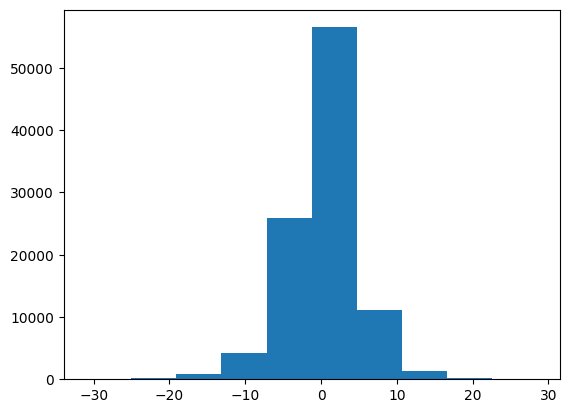

In [37]:
from matplotlib import pyplot as plt
plt.hist(inputs[0])

In [40]:
from sklearn.linear_model import LogisticRegressionCV

In [72]:
clf = LogisticRegressionCV(solver='liblinear', penalty='l1', n_jobs=-1, max_iter=10, cv=2)

In [73]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(aggregated_dataset['features'], aggregated_dataset['y'], test_size=.1)

In [74]:
clf.fit(X_train, y_train)

python(11359) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11360) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11361) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11362) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11363) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11364) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11365) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11366) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11367) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11368) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


KeyboardInterrupt: 

In [ ]:
from sklearn.metrics import roc_auc_score

In [ ]:
# roc_auc_score(labels.numpy(), clf.predict_proba(inputs.numpy())[:, 1])

In [ ]:
roc_auc_score(y_test, clf.predict_proba(X_test)[:, 1])

0.537625979843225

In [8]:
import nibabel as nib
import numpy as np
import os
import sys
from concurrent.futures import ProcessPoolExecutor


def convert_nii_file(nii_path, dest_dir):
    """
    Converts a single NIfTI file to a NumPy array file and saves it in the destination directory.
    Args:
    - nii_path (str): Path to the NIfTI file.
    - dest_dir (str): Path to the destination directory where the NumPy array file will be saved.
    """
    file_name = os.path.basename(nii_path)
    npy_path = os.path.join(dest_dir, os.path.splitext(file_name)[0] + '.npy')
    
    # Load the NIfTI file and get the data as a NumPy array
    nii_data = nib.load(nii_path)
    image_data = nii_data.get_fdata()
    
    # Save the NumPy array as a .npy file
    np.save(npy_path, image_data)
    print(f'Converted and saved: {npy_path}')

def convert_nii_to_npy_parallel(source_dir, dest_dir):
    """
    Converts all NIfTI files in the source directory to NumPy array files in parallel and saves them in the destination directory.
    Args:
    - source_dir (str): Path to the source directory containing NIfTI files.
    - dest_dir (str): Path to the destination directory where NumPy array files will be saved.
    """

    # Ensure the destination directory exists
    os.makedirs(dest_dir, exist_ok=True)

    # Get a list of all NIfTI files in the source directory
    nii_files = [os.path.join(source_dir, file_name) for file_name in os.listdir(source_dir)
                 if file_name.endswith('.nii') or file_name.endswith('.nii.gz')]
    [convert_nii_file(nii_path, dest_dir) for nii_path in nii_files]
    # Use ProcessPoolExecutor to convert files in parallel
    # with ProcessPoolExecutor() as executor:
        # Create a list of tasks
    # tasks = [executor.submit(convert_nii_file, nii_path, dest_dir) for nii_path in nii_files]
    
    # # Wait for all tasks to complete (optional, as tasks are automatically awaited upon exiting the context)
    # for task in tasks:
    #     task.result()

if __name__ == '__main__':
    # if len(sys.argv) != 3:
    #     print("Usage: python script.py <source_dir> <dest_dir>")
    #     sys.exit(1)
    source_dir = '/Users/naji/Downloads/ADNI_Flattened'
    dest_dir = '/Users/naji/Downloads/ADNI_Flattened_npy'
    # source_dir, dest_dir = sys.argv[1], sys.argv[2]
    convert_nii_to_npy_parallel(source_dir, dest_dir)


Converted and saved: /Users/naji/Downloads/ADNI_Flattened_npy/ADNI_068_S_4067_MR_MT1__GradWarp__N3m_Br_20110623110942698_S111008_I241366.npy
Converted and saved: /Users/naji/Downloads/ADNI_Flattened_npy/ADNI_041_S_5082_MR_MT1__GradWarp__N3m_Br_20130314162621463_S182655_I363336.npy
Converted and saved: /Users/naji/Downloads/ADNI_Flattened_npy/ADNI_072_S_2027_MR_MT1__N3m_Br_20110309094037723_S89417_I223240.npy
Converted and saved: /Users/naji/Downloads/ADNI_Flattened_npy/ADNI_012_S_4545_MR_MT1__N3m_Br_20140416104250059_S215041_I420257.npy
Converted and saved: /Users/naji/Downloads/ADNI_Flattened_npy/ADNI_099_S_2042_MR_MT1__GradWarp__N3m_Br_20120424142012603_S90767_I300278.npy
Converted and saved: /Users/naji/Downloads/ADNI_Flattened_npy/ADNI_135_S_4566_MR_MT1__GradWarp__N3m_Br_20140422190309206_S215640_I421282.npy
Converted and saved: /Users/naji/Downloads/ADNI_Flattened_npy/ADNI_009_S_0842_MR_MT1__GradWarp__N3m_Br_20121204143339256_S172999_I349246.npy
Converted and saved: /Users/naji/Do

In [15]:
import pandas as pd

# Read the datasets into pandas DataFrames
df2 = pd.read_csv('/Users/naji/phd_codebase/psych_model/LPUModels/Self-PU/adni_dx_suvr_clean.csv')
df1 = pd.read_csv('/Users/naji/Downloads/MPRAGEMETA_24Feb2024.csv')
df3 = pd.read_csv('/Users/naji/phd_codebase/psych_model/LPUModels/Self-PU/UCBERKELEYAV45_11_16_21_24Feb2024.csv')

df1['ScanDate'] = pd.to_datetime(df1['ScanDate'])
df2['MRI Date'] = pd.to_datetime(df2['MRI Date'])
# Extract the rightmost four digits from 'SubjectID' and create a new column 'MatchID' to match
df1['MatchID'] = df1['SubjectID'].str.extract(r'(\d{4})$')

# Format 'RID' in the second dataframe to match the 'RID' in the first dataframe
df2['formatted_RID'] = df2['RID'].astype(str).str.zfill(4)

# Merge the two dataframes based on 'MatchID' and 'formatted_RID'
# Ensure both are strings for a successful merge
df_merged = df2.merge(df1[['MatchID', 'ImageUID', 'SubjectID', 'ScanDate']], left_on=['formatted_RID', 'MRI Date'], right_on=['MatchID', 'ScanDate'], how='left')

# Now df_merged contains the second dataset with the 'SubjectID' column added from the first dataset
# You can now save this merged dataframe to a new CSV if needed
# df_merged.to_csv('path_to_merged_csv.csv', index=False)  # Replace with the desired path to save the merged CSV


/var/folders/d7/lxkpmjhd7p7b6np8x0132k4w0000gp/T/ipykernel_1065/2052992496.py:9: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df2['MRI Date'] = pd.to_datetime(df2['MRI Date'])


In [20]:
df_merged

,RID,MRI ImageID,Viscode,DX,SUVR,PU_label,label,MRI Date,AV45 Date,AV45 ImageID,Age,Gender,ApoE4,Education,formatted_RID,MatchID,ImageUID,SubjectID,ScanDate
0,21,222684.0,m60,1,1.0237,0,0,2010-10-08,10/8/10,196545.0,77.734247,2,NC,18,0021,0021,196073.0,011_S_0021,2010-10-08
1,21,222684.0,m60,1,1.0237,0,0,2010-10-08,10/8/10,196545.0,77.734247,2,NC,18,0021,0021,196077.0,011_S_0021,2010-10-08
2,21,222684.0,m60,1,1.0237,0,0,2010-10-08,10/8/10,196545.0,77.734247,2,NC,18,0021,0021,222684.0,011_S_0021,2010-10-08
3,21,222684.0,m60,1,1.0237,0,0,2010-10-08,10/8/10,196545.0,77.734247,2,NC,18,0021,0021,222738.0,011_S_0021,2010-10-08
4,21,340931.0,m84,1,0.9877,0,0,2012-10-04,10/3/12,338513.0,79.726027,2,NC,18,0021,0021,338266.0,011_S_0021,2012-10-04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8102,5296,NaN,NaN,1,1.1255,0,1,2013-12-10,12/18/13,NaN,69.427397,1,NC,14,5296,5296,416078.0,053_S_5296,2013-12-10
8103,5296,765612.0,m24,1,1.2831,1,1,2015-12-18,12/17/15,589636.0,71.449315,1,NC,14,5296,5296,583247.0,053_S_5296,2015-12-18
8104,5296,765612.0,m24,1,1.2831,1,1,2015-12-18,12/17/15,589636.0,71.449315,1,NC,14,5296,5296,583254.0,053_S_5296,2015-12-18
8105,5296,765612.0,m24,1,1.2831,1,1,2015-12-18,12/17/15,589636.0,71.449315,1,NC,14,5296,5296,765609.0,053_S_5296,2015-12-18


In [16]:
# df3 = pd.read_csv('/Users/naji/phd_codebase/psych_model/LPUModels/Self-PU/ucberkeleyav45.csv')

In [17]:
df_merged_final = df_merged.merge(df3[['MatchID', 'ImageUID', 'SubjectID', 'ScanDate']], left_on=['formatted_RID', 'MRI Date'], right_on=['MatchID', 'ScanDate'], how='left')


KeyError: "None of [Index(['MatchID', 'ImageUID', 'SubjectID', 'ScanDate'], dtype='object')] are in the [columns]"

In [11]:
for item in df_merged['ImageUID'].unique().tolist():
    if not np.isnan(item):
        print(int(item))

196073
196077
222684
222738
338266
338269
340931
340936
543536
543543
570693
570703
212936
212946
300270
300271
352965
352966
353875
353876
207220
207222
294742
294743
336528
363038
227807
227808
294756
294759
355997
356001
363039
363040
209759
209760
297043
297044
257035
257040
297016
297017
379102
379103
394775
394776
208163
208165
274522
274523
464355
464357
468856
468857
229512
229514
294770
294774
400300
400301
408379
408380
208195
208198
274524
274525
464324
464329
468854
468855
217230
217232
294780
294781
358377
358379
363041
363042
473762
473765
477199
477200
214838
214841
275404
275405
411283
411284
414371
414372
776218
776224
788062
788072
209535
209543
217719
352141
352142
410806
410808
473733
473734
488709
488710
202159
202166
223347
223348
339110
339118
342493
342494
473789
473793
473799
477203
477204
477205
215178
215182
293729
293730
285285
285287
326612
326613
213947
213952
297306
297307
358155
358158
398181
398182
472156
472161
477193
477194
239647
239648
274555
274556

In [3]:
df_merged_final

NameError: name 'df_merged_final' is not defined

In [51]:
df_merged['SubjectID'].unique()

array(['011_S_0021', '011_S_0023', '023_S_0031', ..., '057_S_5292',
       '057_S_5295', '053_S_5296'], dtype=object)

In [36]:
df_merged.to_csv('/Users/naji/Downloads/merged_adni_dian.csv', index=False)

In [52]:
df_merged

,RID,MRI ImageID,Viscode,DX,SUVR,PU_label,label,MRI Date,AV45 Date,AV45 ImageID,Age,Gender,ApoE4,Education,formatted_RID,MatchID,SubjectID
0,21,222684.0,m60,1,1.0237,0,0,10/8/10,10/8/10,196545.0,77.734247,2,NC,18,0021,0021,011_S_0021
1,21,222684.0,m60,1,1.0237,0,0,10/8/10,10/8/10,196545.0,77.734247,2,NC,18,0021,0021,011_S_0021
2,21,222684.0,m60,1,1.0237,0,0,10/8/10,10/8/10,196545.0,77.734247,2,NC,18,0021,0021,011_S_0021
3,21,222684.0,m60,1,1.0237,0,0,10/8/10,10/8/10,196545.0,77.734247,2,NC,18,0021,0021,011_S_0021
4,21,222684.0,m60,1,1.0237,0,0,10/8/10,10/8/10,196545.0,77.734247,2,NC,18,0021,0021,011_S_0021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49020,5296,765612.0,m24,1,1.2831,1,1,12/18/15,12/17/15,589636.0,71.449315,1,NC,14,5296,5296,053_S_5296
49021,5296,765612.0,m24,1,1.2831,1,1,12/18/15,12/17/15,589636.0,71.449315,1,NC,14,5296,5296,053_S_5296
49022,5296,765612.0,m24,1,1.2831,1,1,12/18/15,12/17/15,589636.0,71.449315,1,NC,14,5296,5296,053_S_5296
49023,5296,765612.0,m24,1,1.2831,1,1,12/18/15,12/17/15,589636.0,71.449315,1,NC,14,5296,5296,053_S_5296


In [2]:
import numpy as np
test =np.load('/Users/naji/phd_codebase/psych_model/LPUModels/Self-PU/rid.image_id.test.adni.npy')

In [5]:
test

array(['5213.544717', '5213', '69.275404', '69.414371', '69.788072',
       '5023', '5023.461137', '4020.377161', '4020.506287', '4020',
       '4707', '4863', '4218.398315', '4218', '5124', '5124.729735',
       '4549', '4465.788073', '4465', '4179.398321', '4179.721278',
       '4179', '96.293729', '1425.300291', '920', '920.467250',
       '920.377483', '4952', '4952.666345', '2027.334169', '2027', '4984',
       '4134', '4784.451331', '4784', '618.370058', '618.728497', '4410',
       '4410.721352', '4410.418779', '4517', '702.288895', '702.377040',
       '4276', '2205', '1232.297281', '1232.411287', '4192',
       '4192.398263', '4920', '4661.434285', '4661', '2332.488820',
       '2332.411325', '2332', '1269.296805', '4955', '4310.399890',
       '4310', '4448.415838', '4448', '4453', '4453.413083', '4348',
       '4893', '4893.451360', '4893.782899', '2146.351380', '2146.883328',
       '2146.451372', '2146', '2220', '2220.362865', '2220.474216',
       '5283', '4263.401002', '

In [92]:
import nibabel as nib
img = nib.load('tpl-MNI152NLin2009cSym_res-1_T1w.nii')

In [98]:
import numpy as np
np.unique(np.asarray(img.get_fdata()))

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
       26., 27., 28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38.,
       39., 40., 41., 42., 43., 44., 45., 46., 47., 48., 49., 50., 51.,
       52., 53., 54., 55., 56., 57., 58., 59., 60., 61., 62., 63., 64.,
       65., 66., 67., 68., 69., 70., 71., 72., 73., 74., 75., 76., 77.,
       78., 79., 80., 81., 82., 83., 84., 85., 86., 87., 88., 89., 90.,
       91., 92., 93., 94., 95., 96., 97., 98.])

In [ ]:
import nibabel as nib
import numpy as np

# Load the atlas NIfTI file
atlas_img = nib.load('tpl-MNI152NLin2009cSym_res-1_atlas-CerebrA_dseg.nii.gz')
atlas_data = atlas_img.get_fdata()

# Initialize mask arrays
left_hippocampus_mask = np.zeros(atlas_data.shape)
right_hippocampus_mask = np.zeros(atlas_data.shape)

# Set voxels with the hippocampus labels to 1 in the masks
left_hippocampus_mask[atlas_data == 99] = 1
right_hippocampus_mask[atlas_data == 48] = 1

# Create and save the NIfTI files for the masks
left_mask_img = nib.Nifti1Image(left_hippocampus_mask, atlas_img.affine)
right_mask_img = nib.Nifti1Image(right_hippocampus_mask, atlas_img.affine)

nib.save(left_mask_img, 'left_hippocampus_mask.nii.gz')
nib.save(right_mask_img, 'right_hippocampus_mask.nii.gz')